In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

%matplotlib inline

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Covid19_prediction_model/covid_19_india.csv')

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15806 non-null  int64 
 1   Date                      15806 non-null  object
 2   Time                      15806 non-null  object
 3   State/UnionTerritory      15806 non-null  object
 4   ConfirmedIndianNational   15806 non-null  object
 5   ConfirmedForeignNational  15806 non-null  object
 6   Cured                     15806 non-null  int64 
 7   Deaths                    15806 non-null  int64 
 8   Confirmed                 15806 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,15806.000000,1.580600e+04,15806.000000,1.580600e+04
mean,7903.500000,1.986514e+05,3004.846324,2.204181e+05
std,4562.943513,4.299306e+05,7919.358996,4.781429e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3952.250000,2.082000e+03,15.000000,3.291250e+03
50%,7903.500000,2.293950e+04,385.000000,2.927950e+04
75%,11854.750000,2.208698e+05,2690.500000,2.472700e+05
max,15806.000000,5.564348e+06,100470.000000,5.842000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


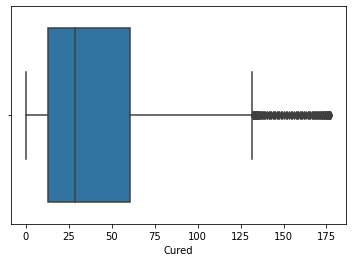

In [ ]:
sns.boxplot(data.Cured)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


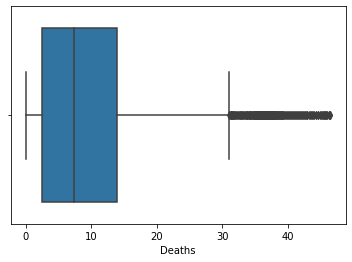

In [ ]:
sns.boxplot(data.Deaths)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


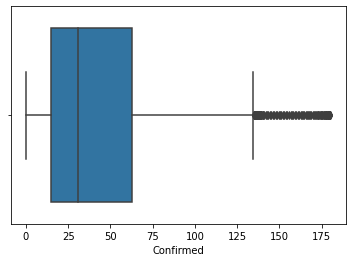

In [ ]:
sns.boxplot(data.Confirmed)

In [6]:
data = data.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [7]:
le=LabelEncoder()
data['State/UnionTerritory'] = le.fit_transform(data['State/UnionTerritory'].astype('str'))
data['Date'] = le.fit_transform(data['Date'].astype('str'))
data['Time'] = le.fit_transform(data['Time'].astype('str'))
data

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,0,2,19,0,0,1
1,1,2,19,0,0,1
2,2,2,19,0,0,2
3,3,2,19,0,0,3
4,4,2,19,0,0,3
...,...,...,...,...,...,...
15801,495,4,34,564303,3394,593103
15802,495,4,36,49579,572,56169
15803,495,4,39,313566,6731,334419
15804,495,4,38,1662069,21333,1699083


In [ ]:
data.corr()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
Date,1.000000,0.488178,0.001446,0.395225,0.281614,0.389214
Time,0.488178,1.000000,-0.007506,0.145239,0.118734,0.144668
State/UnionTerritory,0.001446,-0.007506,1.000000,0.042551,0.080736,0.044388
Cured,0.395225,0.145239,0.042551,1.000000,0.910045,0.996711
Deaths,0.281614,0.118734,0.080736,0.910045,1.000000,0.910530
Confirmed,0.389214,0.144668,0.044388,0.996711,0.910530,1.000000


In [ ]:
data.describe()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
count,15806.000000,15806.000000,15806.000000,1.580600e+04,15806.000000,1.580600e+04
mean,273.608946,3.748387,20.111793,1.986514e+05,3004.846324,2.204181e+05
std,129.442174,0.800124,11.625190,4.299306e+05,7919.358996,4.781429e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,162.000000,4.000000,11.000000,2.082000e+03,15.000000,3.291250e+03
50%,275.000000,4.000000,20.000000,2.293950e+04,385.000000,2.927950e+04
75%,386.000000,4.000000,30.000000,2.208698e+05,2690.500000,2.472700e+05
max,495.000000,6.000000,40.000000,5.564348e+06,100470.000000,5.842000e+06


In [8]:
data['Cured']=np.cbrt(data.Cured)

In [9]:
data['Confirmed']=np.cbrt(data.Confirmed)

In [10]:
data['Deaths']=np.cbrt(data.Deaths)

In [11]:
data_cured = data
data_confirmed = data

# Prediction for Confirmed

In [12]:
X = data_confirmed.drop("Confirmed", axis=1)
y = data_confirmed['Confirmed']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.3)

## Linear Regression

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("Linear Regression Score for Confirmed: ",lm.score(X_test,y_test))

Linear Regression Score for Confirmed:  0.9961953724678326


In [16]:
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

In [17]:
print(metrics.mean_absolute_error(y_test, predictions_test))
print(metrics.mean_squared_error(y_test, predictions_test))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

1.4027172892281004
3.864948992765614
1.9659473524908073


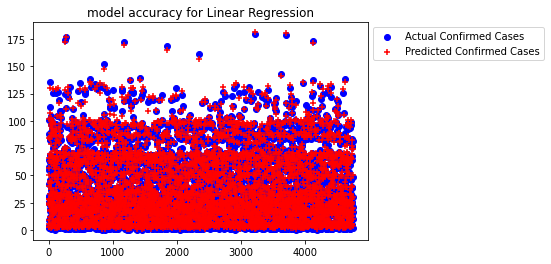

In [18]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(predictions_test)), predictions_test, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for Linear Regression')
# plt.ylabel('accuracy')
# plt.xlabel('')
plt.legend(['Actual Confirmed Cases', 'Predicted Confirmed Cases'], bbox_to_anchor=(1,1))
plt.show()

## Lasso Regression

In [ ]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1e5)

In [ ]:
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = lassoreg.predict(X_test)

In [ ]:
print("Lasso Regression Score for Confirmed: ",lassoreg.score(X_test, y_test))

Lasso Regression Score for Confirmed:  0.9961979804287102


In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4024089797590884
3.8622996832915577
1.9652734372833613


##Ridge Regression

In [ ]:
ridgereg = Ridge(alpha=0.0001,normalize=True)

In [ ]:
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridgereg.predict(X_test)

In [ ]:
print("Ridge Regression Score for Confirmed:",ridgereg.score(X_test, y_test))

Ridge Regression Score for Confirmed: 0.9961958778740893


In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4025105042322563
3.8644355734138176
1.965816770051018


##Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin2.predict(poly.fit_transform(X_test))
y_train_pred = lin2.predict(poly.fit_transform(X_train))

In [ ]:
r2 = r2_score(y_test,y_pred)
print("Polynomial Regression Score for Confirmed:",r2)

Polynomial Regression Score for Confirmed: 0.9969445202295694


In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.203913136344045
3.103923672237825
1.7617955818533049


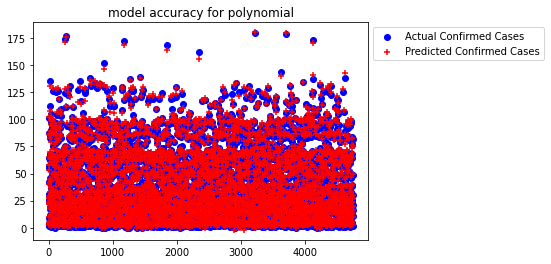

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for polynomial')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Confirmed Cases', 'Predicted Confirmed Cases'], bbox_to_anchor=(1,1))
plt.show()

##Neural Network

In [19]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [20]:
cp_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
cp = ModelCheckpoint(cp_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
cb_list = [cp]

In [21]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=cb_list)

277/277 [==============================] - 1s 3ms/step - loss: 0.8281 - mean_absolute_error: 0.8281 - val_loss: 0.9619 - val_mean_absolute_error: 0.9619

Epoch 00100: val_loss did not improve from 0.70486


In [22]:
y_pred = NN_model.predict(X_test)
y_train_pred = NN_model.predict(X_train)

In [23]:
print("Error in Neural Network model for test:")
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error in Neural Network model for test:
0.911570971096408
1.945946061828413
1.394971706461609


In [24]:
print("Error in Neural Network model for train:")
print(metrics.mean_absolute_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_train, y_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Error in Neural Network model for train:
0.932527822014484
2.1601172629152305
1.469733738782379


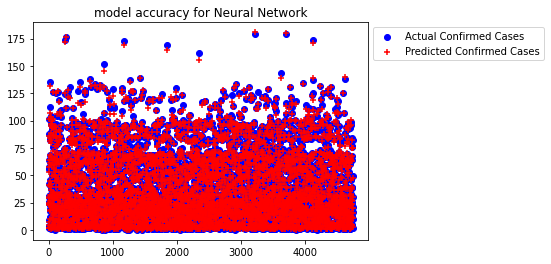

In [25]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for Neural Network')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Confirmed Cases', 'Predicted Confirmed Cases'], bbox_to_anchor=(1,1))
plt.show()

# Prediction for Deaths

In [26]:
X = data.drop("Deaths", axis=1)
y = data['Deaths']

In [ ]:
# x =le.inverse_transform(data['State/UnionTerritory'])
# y = le.inverse_transform(data['Date'])
# z = le.inverse_transform(data['Time'])
# print(x)
# print(y)
# print(z)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.3)

##Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Linear Regression Score: ",lm.score(X_test,y_test))

Linear Regression Score:  0.9261877662686442


In [ ]:
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

In [ ]:
print(metrics.mean_absolute_error(y_test, predictions_test))
print(metrics.mean_squared_error(y_test, predictions_test))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

1.4814647634378202
4.509155068422597
2.1234771174709177


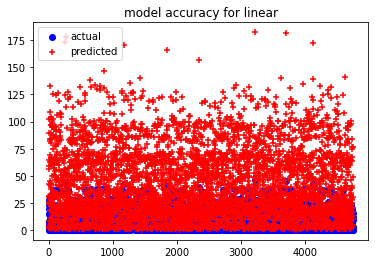

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for linear')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

## Lasso Regression

In [ ]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1e5)

In [ ]:
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = lassoreg.predict(X_test)

In [ ]:
lassoreg.score(X_test, y_test)

0.9261005122660889

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

##Ridge Regression

In [ ]:
ridgereg = Ridge(alpha=0.0001,normalize=True)

In [ ]:
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridgereg.predict(X_test)

In [ ]:
ridgereg.score(X_test, y_test)

0.9261684976738364

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4814678728667827
4.510332177927977
2.1237542649581607


##Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin2.predict(poly.fit_transform(X_test))

In [ ]:
r2 = r2_score(y_test,y_pred)
print("Polynomial Regression Score for Deaths:",r2)

Polynomial Regression Score for Deaths: 0.9364025194789636


In [ ]:
print("Error in Polynomial Regression model for deaths:")
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error in Polynomial Regression model for deaths:
1.3979748390922215
3.8851405401719616
1.9710759853876667


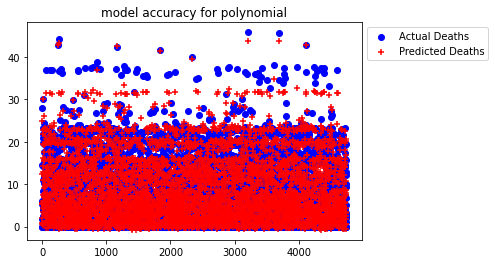

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for polynomial')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Deaths', 'Predicted Deaths'], bbox_to_anchor=(1,1))
plt.show()

##Neural Network

In [28]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [29]:
cp_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
cp = ModelCheckpoint(cp_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
cb_list = [cp]

In [ ]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=cb_list)

In [32]:
y_pred = NN_model.predict(X_test)
y_train_pred = NN_model.predict(X_train)

In [33]:
print("Error in Neural Network model for test")
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error in Neural Network model for test
0.4453828025112983
0.9755520621491797
0.9877003908823665


In [34]:
print("Error in Neural Network model for train")
print(metrics.mean_absolute_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_train, y_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Error in Neural Network model for train
0.4490143949215653
1.0547405394852936
1.0270056180397913


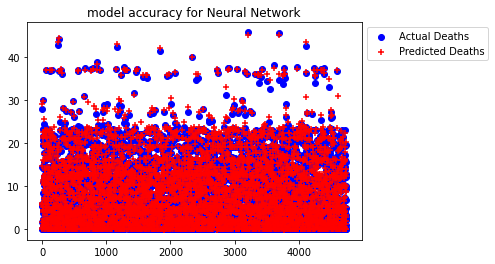

In [36]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for Neural Network')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Deaths', 'Predicted Deaths'], bbox_to_anchor=(1,1))
plt.show()

# Prediction for Cured

In [37]:
X = data_cured.drop("Cured", axis=1)
y = data_cured['Cured']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.3)

## Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Linear Regression Score: ",lm.score(X_test,y_test))

Linear Regression Score:  0.9960596597572258


In [ ]:
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

In [ ]:
print(metrics.mean_absolute_error(y_test, predictions_test))
print(metrics.mean_squared_error(y_test, predictions_test))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

1.416631836676549
3.924866711972001
1.9811276364666668


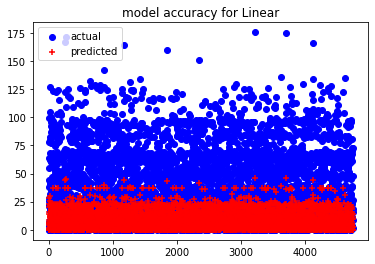

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for Linear')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

## Lasso Regression

In [ ]:
lassoreg = Lasso(alpha=0.0001,normalize=True, max_iter=1e5)

In [ ]:
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred = lassoreg.predict(X_test)

In [ ]:
lassoreg.score(X_test, y_test)

0.9960526076621509

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4181996573791762
3.931891113801325
1.9828996731557866


##Ridge Regression

In [ ]:
ridgereg = Ridge(alpha=0.0001,normalize=True)

In [ ]:
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridgereg.predict(X_test)

In [ ]:
ridgereg.score(X_test, y_test)

0.9960576032735642

In [ ]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4171188571569686
3.9269151199190104
1.9816445493374968


##Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin2.predict(poly.fit_transform(X_test))

In [ ]:
r2 = r2_score(y_test,y_pred)
print("Polynomial Regression Score for Cured:",r2)

Polynomial Regression Score for Cured: 0.9968678493729883


In [ ]:
print('Error in Polynomial Regression for Cured:')
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error in Polynomial Regression for Cured:
1.2314390711143113
3.119850818817989
1.7663099441541932


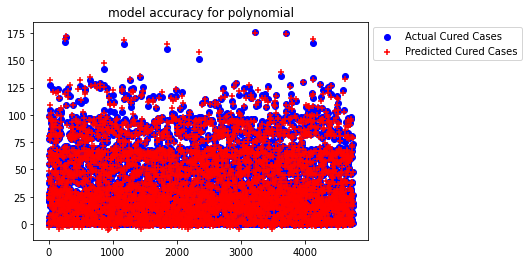

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for polynomial')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Cured Cases', 'Predicted Cured Cases'], bbox_to_anchor=(1,1))
plt.show()

##Neural Network

In [39]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
cp = ModelCheckpoint(cp_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
cb_list = [cp]

In [41]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=cb_list)

277/277 [==============================] - 1s 3ms/step - loss: 0.8647 - mean_absolute_error: 0.8647 - val_loss: 0.8493 - val_mean_absolute_error: 0.8493

Epoch 00100: val_loss did not improve from 0.75634


In [43]:
y_pred = NN_model.predict(X_test)
y_train_pred = NN_model.predict(X_train)

In [44]:
print("Error in Neural Network model for test:")
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error in Neural Network model for test:
0.8251979806254844
1.6628275740856282
1.2895067173480053


In [45]:
print("Error in Neural Network model for train:")
print(metrics.mean_absolute_error(y_train, y_train_pred))
print(metrics.mean_squared_error(y_train, y_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Error in Neural Network model for train:
0.8429170047114775
1.8766335354304362
1.3699027467051945


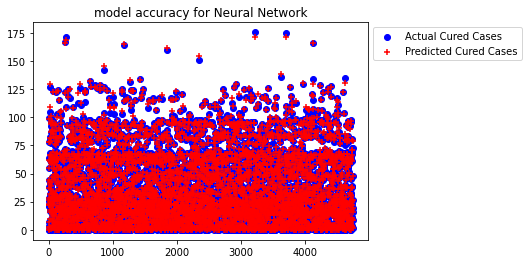

In [46]:
plt.scatter(range(len(y_test)), y_test, color='blue', marker = 'o')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker= '+')
# plt.scatter(y_test, y_pred)
# plt.plot(y_pred)
plt.title('model accuracy for Neural Network')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['Actual Cured Cases', 'Predicted Cured Cases'], bbox_to_anchor=(1,1))
plt.show()